In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_excel(r'C:/Users/ASUS/Downloads/Data_Train.xlsx')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.dropna(inplace =True)

In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# EDA

In [8]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])

In [9]:
data['Journey_day']=pd.to_datetime(data.Date_of_Journey,format= '%d%m%Y').dt.day

In [10]:
data['Journey_month']=pd.to_datetime(data.Date_of_Journey,format='%d%m%Y').dt.month

In [11]:
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [12]:
data['Dep_hour'] =pd.to_datetime(data.Dep_Time).dt.hour
data['Dep_Min'] =pd.to_datetime(data.Dep_Time).dt.minute
data.drop(['Dep_Time'],axis =1,inplace =True)

In [13]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [14]:
data['Arrival_hour']=pd.to_datetime(data.Arrival_Time).dt.hour
data['Arrival_min']=pd.to_datetime(data.Arrival_Time).dt.minute
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [15]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [16]:
data['Duration_Hours'] = data['Duration'].apply(lambda x: int(re.findall(r'(\d+)h', x)[0]) if 'h' in x else 0)
data['Duration_Minutes'] = data['Duration'].apply(lambda x: int(re.findall(r'(\d+)m', x)[0]) if 'm' in x else 0)


In [17]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [18]:
data.drop(['Duration'],axis =1,inplace =True)

In [19]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [20]:
#convertings into numerical datatype
data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [21]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,3,1,16,50,21,35,4,45


In [22]:
data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [23]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


In [24]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

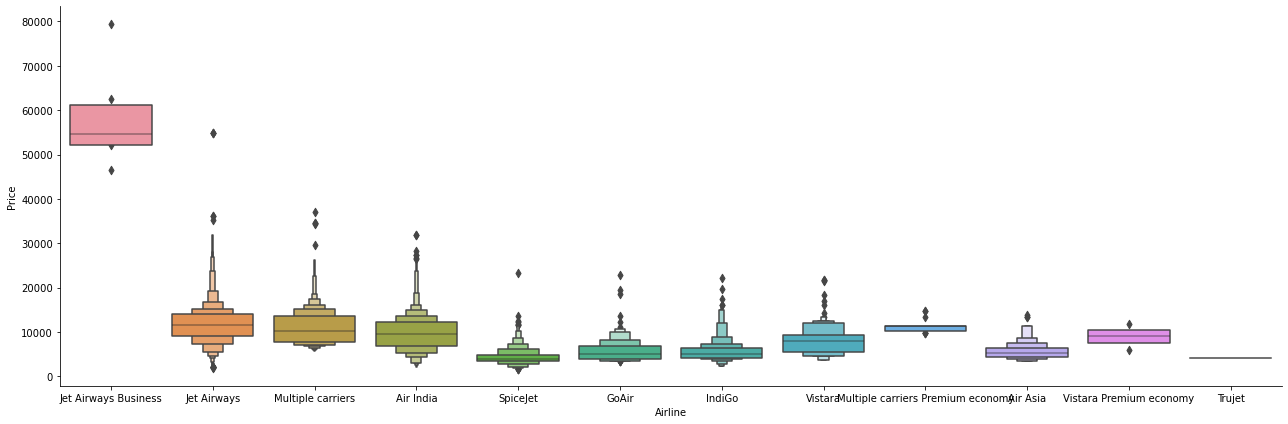

In [25]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [26]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [27]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [28]:
#using label encoder for converting categorical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
data['Source']=le.fit_transform(data['Source'])
data['Destination']=le.fit_transform(data['Destination'])
data['Airline']=le.fit_transform(data['Airline'])

In [30]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes
0,3,0,5,0,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,7662,5,1,5,50,13,15,7,25
2,4,2,1,2,13882,6,9,9,25,4,25,19,0
3,3,3,0,1,6218,5,12,18,5,23,30,5,25
4,3,0,5,1,13302,3,1,16,50,21,35,4,45


# Test set

In [31]:
data_test= pd.read_excel(r'C:/Users/ASUS/Downloads/Test_set.xlsx')
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [32]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [33]:
data_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [34]:
#seperating date and month
data_test['Date_of_Journey']=pd.to_datetime(data_test['Date_of_Journey'])
data_test['Journey_day']=pd.to_datetime(data_test.Date_of_Journey,format= '%d%m%Y').dt.day
data_test['Journey_month']=pd.to_datetime(data_test.Date_of_Journey,format='%d%m%Y').dt.month

In [35]:
#sep hours and minutes
data_test['Dep_hour'] =pd.to_datetime(data_test.Dep_Time).dt.hour
data_test['Dep_Min'] =pd.to_datetime(data_test.Dep_Time).dt.minute
data_test.drop(['Dep_Time'],axis =1,inplace =True)

In [36]:
#sep hour and minute
data_test['Arrival_hour']=pd.to_datetime(data_test.Arrival_Time).dt.hour
data_test['Arrival_min']=pd.to_datetime(data_test.Arrival_Time).dt.minute
data_test.drop(['Arrival_Time'],axis=1,inplace=True)

In [37]:
data_test['Duration_Hours'] = data_test['Duration'].apply(lambda x: int(re.findall(r'(\d+)h', x)[0]) if 'h' in x else 0)
data_test['Duration_Minutes'] = data_test['Duration'].apply(lambda x: int(re.findall(r'(\d+)m', x)[0]) if 'm' in x else 0)

In [38]:
data_test.drop(['Duration'],axis =1,inplace =True)

In [39]:
data_test.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [40]:
data_test['Source']=le.fit_transform(data_test['Source'])
data_test['Destination']=le.fit_transform(data_test['Destination'])
data_test['Airline']=le.fit_transform(data_test['Airline'])

In [41]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes
0,4,2019-06-06,2,1,DEL → BOM → COK,1,No info,6,6,17,30,4,25,10,55
1,3,2019-12-05,3,0,CCU → MAA → BLR,1,No info,5,12,6,20,10,20,4,0
2,4,2019-05-21,2,1,DEL → BOM → COK,1,In-flight meal not included,21,5,19,15,19,0,23,45
3,6,2019-05-21,2,1,DEL → BOM → COK,1,No info,21,5,8,0,21,0,13,0
4,0,2019-06-24,0,2,BLR → DEL,0,No info,24,6,23,55,2,45,2,50


In [42]:
data_test.drop(['Date_of_Journey','Route','Additional_Info'],axis=1,inplace=True)

In [43]:
data_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes
0,4,2,1,1,6,6,17,30,4,25,10,55
1,3,3,0,1,5,12,6,20,10,20,4,0
2,4,2,1,1,21,5,19,15,19,0,23,45
3,6,2,1,1,21,5,8,0,21,0,13,0
4,0,0,2,0,24,6,23,55,2,45,2,50


# FEATURE SELECTION

<AxesSubplot:>

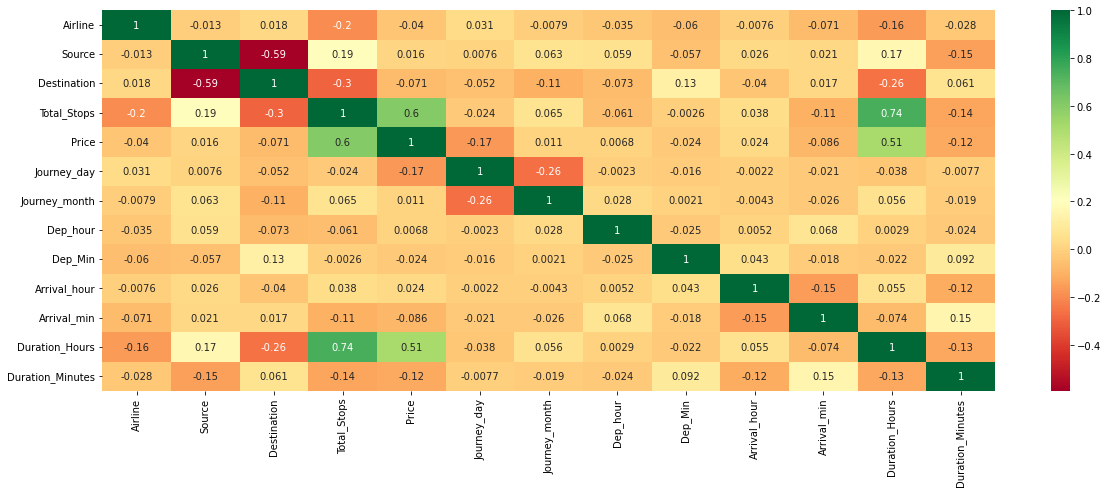

In [44]:
corr =data.corr()
plt.figure(figsize=(20,7))
sns.heatmap(corr,annot =True,cmap='RdYlGn')

In [45]:
x =data.drop(columns=['Price'])
y =data.Price

In [46]:
x.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_Min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Minutes
0,3,0,5,0,24,3,22,20,1,10,2,50
1,1,3,0,2,5,1,5,50,13,15,7,25
2,4,2,1,2,6,9,9,25,4,25,19,0
3,3,3,0,1,5,12,18,5,23,30,5,25
4,3,0,5,1,3,1,16,50,21,35,4,45


In [47]:
#import feature using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()

In [48]:
etr.fit(x,y)

ExtraTreesRegressor()

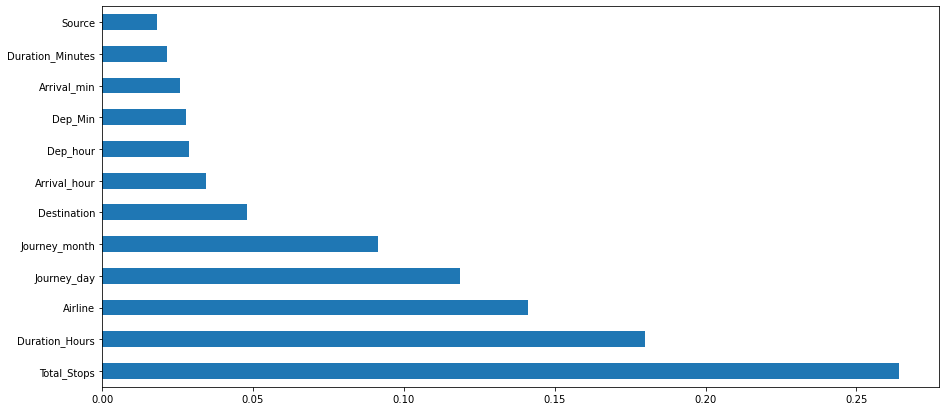

In [49]:
#identifying important features
plt.figure(figsize=(15,7))
feature_importances=pd.Series(etr.feature_importances_,index=x.columns)
feature_importances.nlargest(15).plot(kind='barh')
plt.show()

# FITTING MODEL USING RANDOM FOREST

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8545, 12), (2137, 12), (8545,), (2137,))

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [52]:
new_file=rfr.fit(x_train,y_train)

In [53]:
y_pred=rfr.predict(x_test)
y_pred

array([ 4827.75  ,  9983.58  , 13509.78  , ...,  9614.8975,  9281.3825,
       10025.99  ])

In [54]:
rfr.score(x_test,y_pred)

1.0

In [55]:
rfr.score(x_train,y_train)

0.9531990765122593

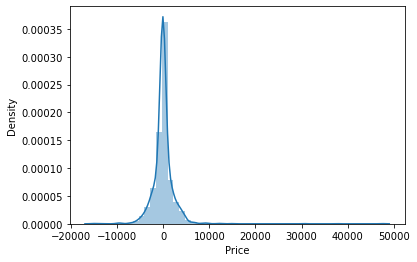

In [56]:
sns.distplot(y_test-y_pred)
plt.show()

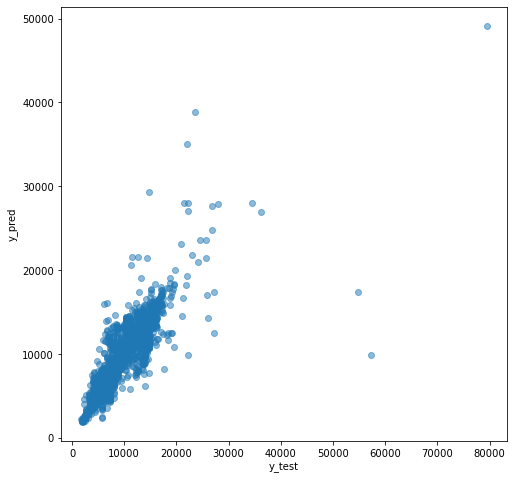

In [57]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [58]:
from sklearn import metrics

In [59]:
print('R2_Score :',metrics.r2_score(y_test,y_pred))

R2_Score : 0.729460854180723


In [60]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1276.7709365960432
MSE: 6184117.570308688
RMSE: 2486.7886058747913


# Hyper PARAMETER TUNING

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
#Randomized search cv
#no of trees sin random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop =1200,num=12)]
#no of features to consider at every split
max_features=['auto','sqrt']
# max no of levels in tree
max_depth= [int(x) for x in np.linspace(5,30,num=6)]
#minimum no of samples required to split a node
min_samples_split=[2,5,10,15,100]
#minimum no of samples required to each leaf node
min_samples_leaf =[1,2,5,10]

In [63]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [64]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [65]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [66]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [67]:
prediction = rf_random.predict(x_test)

In [68]:
prediction

array([ 4749.02442898, 10421.01818788, 13378.23874761, ...,
       10157.32690417,  9410.49238714,  9825.52193943])

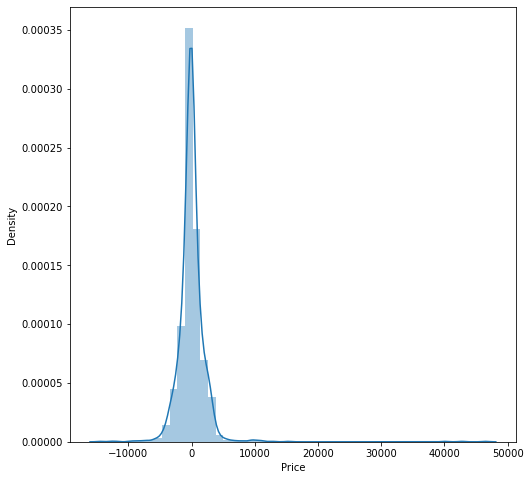

In [69]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

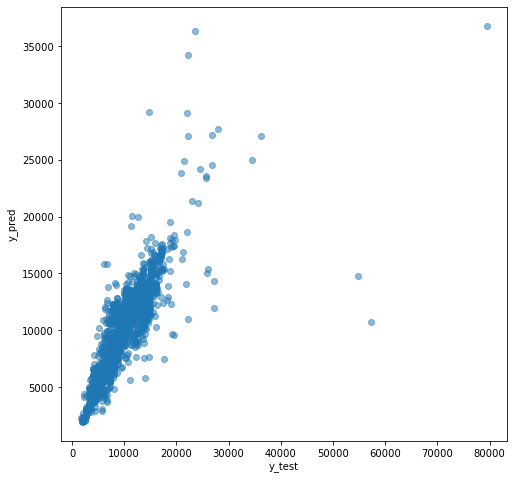

In [70]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1245.309171558084
MSE: 6119189.807132738
RMSE: 2473.699619422847


In [72]:
metrics.r2_score(y_test,prediction)

0.7323012758560665

In [73]:
import pickle
file = open('flight.pickle','wb')
pickle.dump(rfr.fit(x_train,y_train),file)

In [74]:
model=open("flight.pickle",'rb')
forest=pickle.load(model)
file.close()

In [75]:
y_prediction=forest.predict(x_test)
y_prediction

array([ 4937.34  ,  9937.9975, 13601.27  , ...,  9385.049 ,  9058.1725,
        9140.34  ])

In [76]:
metrics.r2_score(y_test,y_prediction)

0.7326294639576163